**Задание 1**

Написать функцию для скрейпинга веб-страниц

In [ ]:
'''
Импортируйте библиотеки для скрейпинга веб-страниц
'''
!pip install requests beautifulsoup4

import requests
from bs4 import BeautifulSoup

In [ ]:
'''
Допишите функцию для скрейпинга
'''

def scrape_text_from_url(url, tag, class_=None):
    response = requests.get(url) # выполните HTML-запрос
    if response.status_code == 200:
      soup = BeautifulSoup(response.text, 'html.parser') # если запрос успешный (возвращается значение 200)
      if class_:
        paragraphs = soup.find_all(tag, class_)# ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег
      else:
        paragraphs = soup.find_all(tag)
      text = '' # создаем переменную text строкового типа, куда мы запишем все найденные совпадения ###
      for p in paragraphs:# начинаем перебор элементов переменной paragraphs
        text += p.get_text() # извлекаем текстовые данные
      return text
    else:# иначе
        print(f"Failed to retrieve page. Status code: {response.status_code}")
        return None #выводим статус-код и сообщение об ошибке ###


In [ ]:
'''
Проверяем функцию для скрейпинга: пример 1
'''

scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p')

'The Chomsky hierarchy in the fields of formal language theory, computer science, and linguistics, is a containment hierarchy of classes of formal grammars. A formal grammar describes how to form strings from a language\'s vocabulary (or alphabet) that are valid according to the language\'s syntax. The linguist Noam Chomsky theorized that four different classes of formal grammars existed that could generate increasingly complex languages. Each class can also completely generate the language of all inferior classes (set inclusive).\nThe general idea of a hierarchy of grammars was first described by Noam Chomsky in "Three models for the description of language".[1] Marcel-Paul Schützenberger also played a role in the development of the theory of formal languages; the paper "The algebraic theory of context free languages"[2] describes the modern hierarchy, including context-free grammars.[3]\nIndependently, alongside linguists, mathematicians were developing models of computation (via aut

In [ ]:
'''
Проверяем функцию для скрейпинга: пример 2
'''

scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')

"Garland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.This violent tale of anaesthetised reporters is just a war yarn with a twist.This easy digital fakeness is there to get the audience used to it...Rather than glorifying war, the film is artful and meditative, making us feel the pointlessness of this violence, how unglamorous and exhausting and unheroic it is.It’s not always subtle, and in some cases it’s even frustrating with some of its narrative decisions, but nothing can deny its uncanny ability to leave you horrified by how war, civil or otherwise, can be truly monstrous from any humanist angle.The film isn’t very deep, but it does paint the grimmest picture possible of a divided nation with bodies bodies bodies everywhere.With a career best performance from Kirsten Dunst and a pulsating sound design, Civil War is a thrilling body of work that should be talked about in jour

**Задание 2**

Написать функцию для сентимент-анализа

In [ ]:
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt

--2024-11-12 19:13:01--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 954 [text/plain]
Saving to: ‘stopwords.txt’

stopwords.txt       100%[===================>]     954  --.-KB/s    in 0s      

2024-11-12 19:13:01 (46.0 MB/s) - ‘stopwords.txt’ saved [954/954]



In [ ]:
'''
Импортируем библиотеки re и nltk для обработки текста
'''

import re
import nltk
from nltk.tokenize import word_tokenize

'''
Загружаем списки слов с положительным и отрицательным значением, и список стоп-слов
'''

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt

'''
Читаем файлы
'''

with open('neg.txt', 'r') as f:
    neg = f.read()

with open('pos.txt', 'r') as f:
    pos = f.read()

with open('stopwords.txt', 'r') as f:
    stopwords = f.read()

'''
Создаем списки слов, разделив строку по знаку \n, и делим список стоп-слов
'''

pos_list = pos.split('\n')
neg_list = neg.split('\n')
stopwords = stopwords.split()

'''
Загружаем необходимые данные для NLTK
'''

nltk.download('punkt')

'''
Функция удаления стоп-слов
'''

def remove_stopwords(text, stopwords):
    words = text.split() # разбейте текст из переменной text на слова
    filtered_words = [] # создайте пустой список:
    for word in words:
      if word.lower() not in stopwords: # если слово, приведенное к нижнему регистру присутствует в списке стоп-слов,
        filtered_words.append(word) # добавьте его в список filtered_words
    cleaned_text = ' '.join(filtered_words) # объедините слова из списка filtered_words в строку с join
    return cleaned_text

'''
Функция для сентимент-анализа
'''

def analyze_sentiment(text, positive_words, negative_words):
    ### По желанию: удалить стоп-слова и знаки препинания; использовать NLP-библиотеки для токенизации ###
    cleantext = re.sub('\W+', ' ', text)
    words = remove_stopwords(cleantext, stopwords)
    words = word_tokenize(words)# запишите результат в переменную words

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
      return 'positive' # если положительный скор больше отрицательного, возвращаем строчку 'positive'
    elif negative_count > positive_count:
      return 'negative' # если отрицательный скор больше положительного, возвращаем строчку 'negative'
    else:
      return 'neutral' # Иначе возвращаем строчку 'neutral'


--2024-11-10 13:57:27--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt.5’

neg.txt.5           100%[===================>]  43.71K  --.-KB/s    in 0.01s   

2024-11-10 13:57:27 (4.38 MB/s) - ‘neg.txt.5’ saved [44759/44759]

--2024-11-10 13:57:27--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Savi

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
'''
Проверяем функцию для анализа тональности: пример 1
'''

data = 'This sample text is awesome!'
analyze_sentiment(data, pos_list, neg_list)

'positive'

In [ ]:
'''
Проверяем функцию для анализа тональности: пример 2
'''
data = 'I hate this sample text.'
analyze_sentiment(data, pos_list, neg_list)

'negative'

In [ ]:
'''
Проверяем функцию для анализа тональности: пример 3
'''
data = 'We love and hate this sample text at the same time!'
analyze_sentiment(data, pos_list, neg_list)

'neutral'

**Задание 3**

Написать функцию для вывода сентимент-скоров

In [ ]:
'''
Допишите функцию для вывода скоров по заданному URL
'''

import re
import nltk
from nltk.tokenize import word_tokenize

def analyze(positive_words, negative_words, url, tag, class_=None):
  scraped_text = scrape_text_from_url(url, tag, class_) # примените функцию scrape_text_from_url
  sentences = scraped_text.split('.') # сегментируйте текст по предложениям (через точку)
  sentiments = [] # создаем пустой список, куда запишем скоры ###
  for sentence in sentences:# начинаем перебор по предложениям ###
    score = analyze_sentiment(sentence, positive_words, negative_words) # получаем скор для данного предложения с помощью функции analyze_sentiment
    sentiments.append(score)# добавляем скор в созданный список ###
  return sentiments # возвращаем список скоров ###

In [ ]:
'''
Тест 1
'''

analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative']

In [ ]:
'''
Тест 2
'''

analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]


['negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative']

**Задача 4**

Визуализировать результаты анализа

In [ ]:
'''
Создаем частотный словарь с помощью библиотеки Counter.
Можно выбрать другие веб-страницы для анализа!
'''

from collections import Counter

sample1 = Counter(analyze(url='https://matplotlib.org/stable/tutorials/pyplot.html', tag='a', class_='reference internal', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://www.w3schools.com/html/html_classes.asp', tag='p', positive_words=pos, negative_words=neg))

sample1


Counter({'negative': 2, 'neutral': 10, 'positive': 1})

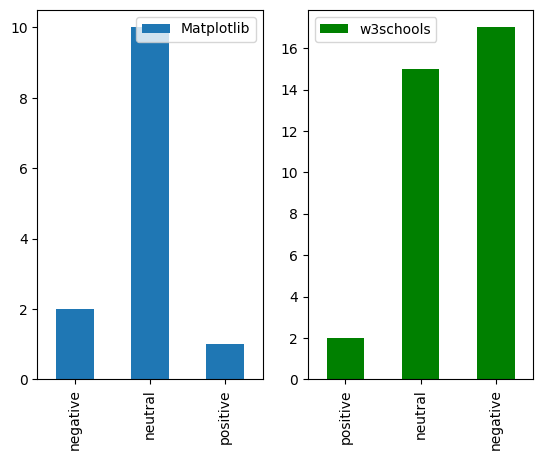

In [ ]:
'''
Создаем визуализацию: попробуйте использование новые данные (данные других url)
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Matplotlib'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['w3schools'])

fig, ax = plt.subplots(ncols=2)

ax[0] = df1.plot.bar(ax=ax[0])
ax[1] = df2.plot.bar(ax=ax[1], color='green')

**Задача 5**

Соберите все 3 функции в одной ячейке ниже. Проанализируйте получшившийся код. Сделайте ревью!

Попробуйте сделать рефакторинг: найти повторы в коде, избыточные конструкции и заменить их на более простые и питоничные решения. Рефакторинг ускоряет выполнение кода и упрощает его чтение.

Улучшите код, добавьте строчки для вывода промежуточных и итоговых результатов; запустите ячейку.

Это творческое задание, правильных решений нет - главное, чтобы код работал! :)

Не забудьте закомментировать свои изменения.

In [ ]:
# Подготовка всех данных
!pip install requests beautifulsoup4
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt

import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open('neg.txt', 'r') as f:
    neg = f.read()

with open('pos.txt', 'r') as f:
    pos = f.read()

with open('stopwords.txt', 'r') as f:
    stopwords = f.read()

pos = pos.split('\n')
neg = neg.split('\n')
stopwords = stopwords.split()

nltk.download('punkt')


--2024-11-10 13:57:39--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt.6’

neg.txt.6           100%[===================>]  43.71K  --.-KB/s    in 0.01s   

2024-11-10 13:57:39 (3.51 MB/s) - ‘neg.txt.6’ saved [44759/44759]

--2024-11-10 13:57:39--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Savi

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def the_main_function(positive_words, negative_words, url, tag, class_=None, stopwords=None):

  # Скрейпинг веб-страницы: оставила, как было изначально в функции
  response = requests.get(url)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    if class_:
      paragraphs = soup.find_all(tag, class_)
    else:
      paragraphs = soup.find_all(tag)
    text = ''
    for p in paragraphs:
      text += p.get_text()
    print(f'Результат скрейпинга веб-страницы: ')
    print(text[:100])
  else:
      print(f"Failed to retrieve page. Status code: {response.status_code}")
      return None
  print('-------------')

  # Очищение текста: соединила удаление пунктуации и стоп-слов в один блок
  text1 = re.sub('\W+', ' ', text)
  words = text1.split()
  filtered_words = []
  for word in words:
    if word.lower() not in stopwords:
      filtered_words.append(word)
  cleaned_text = ' '.join(filtered_words)
  print(f'Очищенный текст: ')
  print(cleaned_text[:100])
  print('-------------')

  # Сентимент анализ и вывод сентимент-скора: соединила две функции, выводится результат только последней
  sentences = text.lower().split('.')
  sentiments = []
  for sentence in sentences:
    words = word_tokenize(sentence)
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)
    if positive_count > negative_count:
      sentiment = 'positive'
    elif negative_count > positive_count:
      sentiment = 'negative'
    else:
      sentiment = 'neutral'
    sentiments.append(sentiment)
  print('Вывод сентимент-скоров:')
  print(sentiments)
  print('--------------')

  # Визуализация данных
  sentiment_counts = Counter(sentiments)
  print('Количество сентимента каждого вида: ')
  return sentiment_counts
  # Я пыталась добавить визуализацию данный с помощью numpy, pandas и matplotlib.pyplot, но ничего не получилось, поэтому оставила только частотный словарь. Пока для меня это сложно :(


In [ ]:
# Проверка
the_main_function(positive_words=pos, negative_words=neg, url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', stopwords=stopwords)

Результат скрейпинга веб-страницы: 
Garland seems poised to be make political points, to show how our current political dysfunction coul
-------------
Очищенный текст: 
Garland seems poised make political points show current political dysfunction lead something far wor
-------------
Вывод сентимент-скоров:
['positive', 'negative', 'positive', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'negative', 'positive', 'neutral', 'negative', 'negative', 'neutral', 'neutral', 'positive', 'neutral', 'negative', 'negative', 'positive', 'neutral']
--------------
Количество сентимента каждого вида: 


Counter({'positive': 8, 'negative': 8, 'neutral': 18})